<a href="https://colab.research.google.com/github/sun9huni/first-repository/blob/main/0512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

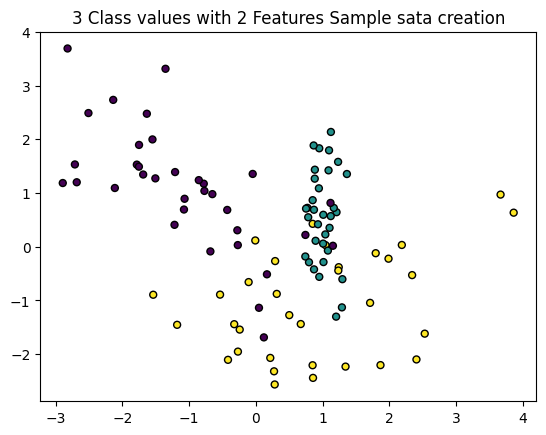

In [119]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample sata creation")

X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                                           n_classes = 3, n_clusters_per_class = 1, random_state = 0)
plt.scatter(X_features[:,0], X_features[:,1], marker = 'o', c = y_labels, s = 25, edgecolor = 'k')

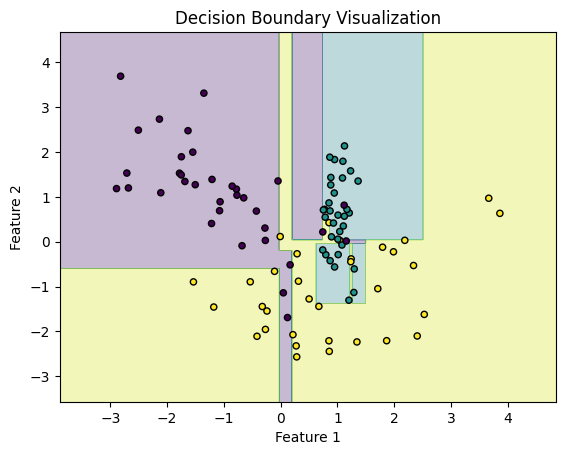

In [120]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 락습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier(random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

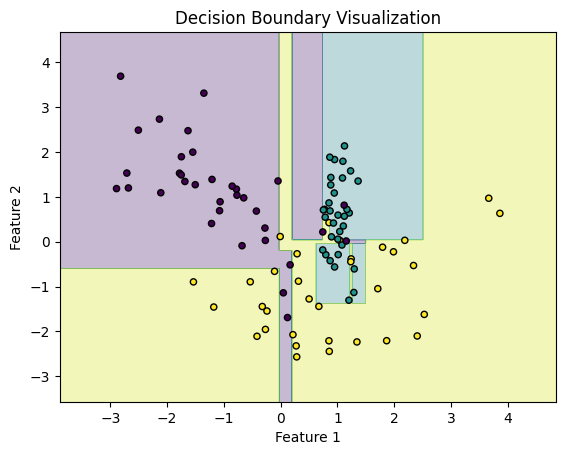

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def visualize_boundary(model, X, y):
    """
    Visualizes the decision boundary of a classifier.

    Args:
        model: The trained classifier model.
        X: The feature data.
        y: The target labels.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title("Decision Boundary Visualization")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

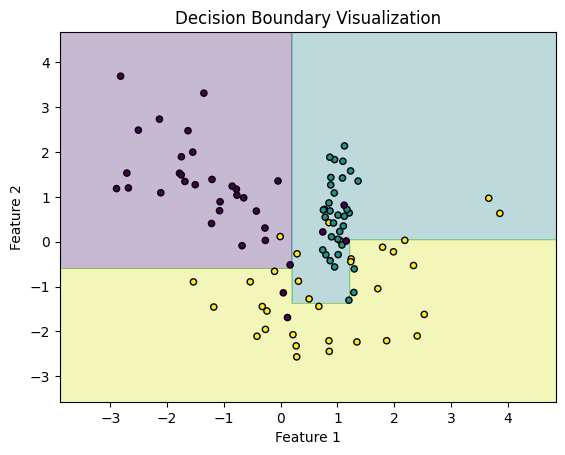

In [122]:
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
# 리프 노드 생성 규칙을 완화 시 이상치에 크게 반응하지 않으면서 좀 더 일반화된 준류 규칙에 따라 분류

dt_clf = DecisionTreeClassifier(min_samples_leaf = 6, random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

앙상블 학습

여러개의 분류기를 생성하고 그 예측을 결합
XGBoost, LightBGM 등등
유형은 보팅, 배깅, 부스팅으로 나뉜다.
보팅은 서로 다른 알고리즘을 가진 분류기를 결합
배깅은 각각의 분류기가 모두 같은 유형이지만, 데이터 샘플링을 서로 다르게 가져간다. 대표적인 배깅 방식이 랜덤 포레스트이다.

부트스트래핑은 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식이다.

하드 보팅 - 예측 결괏값 중 다수의 분류기가 결정한 예측값을 최종 값으로 선정
소프트 보팅 = 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

사이킥런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스 제공

In [123]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [124]:
lr_clf = LogisticRegression(solver = 'liblinear')
knn_clf = KNeighborsClassifier(n_neighbors = 8)

vo_clf = VotingClassifier( estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

#vo_clf 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))


Voting 분류기 정확도: 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


랜덤 포레스트
배깅은 앞에서 소개한 보팅과 다르게 여러개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘이다.

랜점포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 한다.
Bagging은 bootstrap aggreagating의 줄임말이다.

GBM
부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해나가면 학습하는 방식이다.
부스팅의 대표적이 ㄴ구현은 AdaBoost와 gradientBoost가 있다.
AdaBoost(Adaptive Boosting)는 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘이다.

Gradient Boost Machine도 AdaBoost와 유사하나, 가중치 업데이트를 경사 하강법을 이용한다. 오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것이 경사하강법(gradient descent)이다.

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

# Assuming get_human_dataset was intended to load and split the breast cancer dataset
def get_human_dataset():
    """Loads and splits the breast cancer dataset."""
    cancer = load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()


In [126]:
gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행시간: {0:.1f}초".format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행시간: 0.9초


XGBoost
GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결
병렬 CPU 환경에서 병렬학습이 가능해 기존 GBM보다 빠르게 학습 가능

In [127]:
import xgboost as xgb
from xgboost import XGBClassifier

LightGBM
XgBoost는 학습 시간이 오래 걸린다.
LightGBM은 학습 시간이 적고 메모리 사용량도 상대적으로 적다.
리프 중심트리 분할(Leaf Wise) 방식을 사용한다.
기존 대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 균형 트리 분할(Level Wise) 방식을 사용한다. 오버피팅에 강하지만 균형을 맞추기 위한 시간이 필요하다.

LightGBM의 Leaf Wise는 max delta loss를 가지는 leaf node를 지속적으로 분할하면서 depth가 깊어지고 비대칭 적인 트리가 생성된다. 최대 손실값을 가지는 리프 노드를 지속적으로 분할하면 예측 오류 손실을 최소화할 수 있다는 것이 LightGBM의 구현 사상이다.

In [128]:
import lightgbm
from lightgbm import LGBMClassifier

In [129]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)

In [130]:
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]


# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
                 eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]


TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_test, y_test)]
# Use early_stopping() callback function
from lightgbm import early_stopping, log_evaluation

# Remove 'verbose=True' and use log_evaluation callback instead
lgbm_wrapper.fit(X_train, y_train, eval_metric="logloss",
                 eval_set=evals,
                 callbacks=[early_stopping(stopping_rounds=100),
                            log_evaluation(period=10)])  # Print log every 10 iterations

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]b

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(lgbm_wrapper, ax=ax)

# 캐글 산탄데르 고객 만족 예측
370 feature
class label 명 Target
1 - 불만, 0 - 만족
성능 평가 ROC-AUC


# 데이터 전처리

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv("/train_santander.csv", encoding = 'latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [132]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [133]:
print(cust_df['TARGET'].value_counts())
unsat_cnt = cust_df[cust_df['TARGET'] ==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsat 비율은 {0:.2f}'.format((unsat_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsat 비율은 0.04


In [ ]:
cust_df.describe()

-99999 값을 가장 많은 2로 변환 그리고 ID feature drop
그리고 class data set, feature data set 분리해 별도의 data set으로 저장

In [134]:
cust_df['var3'].replace(-9999999, 2, inplace = True)
cust_df.drop('ID', axis = 1, inplace = True)

X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('fature data shape:{0}'.format(X_features.shape))

fature data shape:(76020, 369)


학습과 성능 평가를 위해 원본 데이터 세트에서 train test data set 분리
비대칭한 data set이므로 class인 TARGET 값 분포도가 train data와 test data에 비슷하게 추출됐는지 확인

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state = 42)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('train data Shape:{0}, test set Shape:{1}'.format(X_train.shape, X_test.shape))

print('train set labels 값 분포 비율')
print(y_train.value_counts() /train_cnt)
print(y_test.value_counts() / test_cnt)

train data Shape:(60816, 369), test set Shape:(15204, 369)
train set labels 값 분포 비율
TARGET
0    0.96052
1    0.03948
Name: count, dtype: float64
TARGET
0    0.960076
1    0.039924
Name: count, dtype: float64


XGBoost의 조기 중단(early stopping)의 검증 데이터 세트로 사용하기 위해서 X_train, y_train을 다시 쪼개서 학습과 검증 데이터 세트로 만들기

In [136]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

# XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [144]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators = 500

xgb_clf = XGBClassifier(n_estimators = 100, learning_rate = 0.05,early_stopping_rounds = 100, eval_metric = "auc",
                      random_state = 42)

# 성능 평가 지표를 auc, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr),(X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83761	validation_1-auc:0.80853
[1]	validation_0-auc:0.83880	validation_1-auc:0.80922
[2]	validation_0-auc:0.84494	validation_1-auc:0.81653
[3]	validation_0-auc:0.84672	validation_1-auc:0.81727
[4]	validation_0-auc:0.84766	validation_1-auc:0.81773
[5]	validation_0-auc:0.84913	validation_1-auc:0.81840
[6]	validation_0-auc:0.85052	validation_1-auc:0.81877
[7]	validation_0-auc:0.85101	validation_1-auc:0.81932
[8]	validation_0-auc:0.85219	validation_1-auc:0.81951
[9]	validation_0-auc:0.85193	validation_1-auc:0.81941
[10]	validation_0-auc:0.85216	validation_1-auc:0.81923
[11]	validation_0-auc:0.85256	validation_1-auc:0.82047
[12]	validation_0-auc:0.85289	validation_1-auc:0.82110
[13]	validation_0-auc:0.85393	validation_1-auc:0.82198
[14]	validation_0-auc:0.85558	validation_1-auc:0.82209
[15]	validation_0-auc:0.85631	validation_1-auc:0.82266
[16]	validation_0-auc:0.85670	validation_1-auc:0.82314
[17]	validation_0-auc:0.85763	validation_1-auc:0.82382
[18]	validation_0-au

HyperOpt 이용해 베이지안 최적화 기반으로 XGBoost의 하이퍼 파라미터 튜닝 수행
max_depth = (5,15,1)
min_child_weigth = (1,6,1)
colsample_bytree = (0.5, 0.95)
learning_rate = (0.01, 0.2)

In [142]:
from hyperopt import hp

xgb_search_space = {
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 0.95, 0.01),  # q=0.01 등 적당한 간격
    'learning_rate': hp.quniform('learning_rate', 0.01, 0.2, 0.01)         # q=0.01 등 적당한 간격
}


objective func 만들기
3 Fold clf이용
평균 roc_auc값 반환하되 -1 곱해 최대 roc-auc값이 최소 반환값이 되게 한다.
교차 검증시 xgboost의 조기 중단과 검증 데이터 성능 평가를 위해서 KFOLD 클래스를 이용해 직접 학습과 검증 데이터 세트를 추출하고 이를 교차 검증 횟수 만큼 학습과 성능 평가를 수행
수행 시간을 줄이기 위해 estimators는 100으로 줄이고, early_stopping_rounds도 30으로 줄인뒤 튜닝 완료되면 다시 증가

In [139]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
  sgb_clf = XGBClassifier(n_estimatores = 100, max_depth = int(search_space['max_depth']),
                                                               min_child_weight = int(search_space['min_child_weight']),
                                                               colsample_bytree = search_space['colsample_bytree'],
                                                               learning_rate = search_space['learning_rate'])

In [ ]:
pip install hyperopt

In [167]:
def objective_func(search_space):
    roc_auc_list = []
    xgb_clf = XGBClassifier(
        n_estimators=100,
        max_depth=int(search_space['max_depth']),
        min_child_weight=int(search_space['min_child_weight']),
        colsample_bytree=search_space['colsample_bytree'],
        learning_rate=search_space['learning_rate'],
        eval_metric="auc",
        use_label_encoder=False,
        early_stopping_rounds=30  # <- fit()이 아니라 여기!
    )

    for tr_idx, val_idx in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
        X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]

        xgb_clf.fit(
            X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_val, y_val)],
            verbose=False
        )

        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)


In [168]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin함수를 호출, max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출.
best = fmin(fn = objective_func,
            space = xgb_search_space,
            algo = tpe.suggest,
            max_evals = 50,
            trials = trials, rstate = np.random.default_rng(seed = 30))

print('best:',best)

  0%|          | 0/50 [00:03<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

In [174]:
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = round(0.09,5),
                          max_depth = int(6.0),
                          min_child_weight = int(5.0),
                          colsample_bytree = round(0.5,5),
                          early_stopping_rounds = 100,
                          eval_metric = "auc"
                      )

xgb_clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr),(X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82157	validation_1-auc:0.79844
[1]	validation_0-auc:0.82493	validation_1-auc:0.79932
[2]	validation_0-auc:0.82145	validation_1-auc:0.79656
[3]	validation_0-auc:0.81775	validation_1-auc:0.79116
[4]	validation_0-auc:0.83528	validation_1-auc:0.80984
[5]	validation_0-auc:0.84152	validation_1-auc:0.81870
[6]	validation_0-auc:0.84571	validation_1-auc:0.82217
[7]	validation_0-auc:0.84499	validation_1-auc:0.81993
[8]	validation_0-auc:0.84985	validation_1-auc:0.82438
[9]	validation_0-auc:0.84867	validation_1-auc:0.82190
[10]	validation_0-auc:0.84769	validation_1-auc:0.81943
[11]	validation_0-auc:0.85092	validation_1-auc:0.82425
[12]	validation_0-auc:0.85427	validation_1-auc:0.82737
[13]	validation_0-auc:0.85665	validation_1-auc:0.82932
[14]	validation_0-auc:0.85622	validation_1-auc:0.82749
[15]	validation_0-auc:0.85576	validation_1-auc:0.82591
[16]	validation_0-auc:0.85909	validation_1-auc:0.82896
[17]	validation_0-auc:0.86132	validation_1-auc:0.83104
[18]	validation_0-au

In [150]:
from lightgbm import LGBMClassifier


lgbm_clf = LGBMClassifier(n_estimators = 500, early_stopping_rounds = 100, eval_metric = "auc")

eval_set = [(X_tr, y_tr),(X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr,  eval_set = eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 1691, number of negative: 40880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.143894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13383
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 248
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039722 -> initscore=-3.185321
[LightGBM] [Info] Start training from score -3.185321
Training un

In [151]:
lgbm_search_space = {'num_leaves':hp.quniform('num_leaves',32, 64, 1),
                     'max_depth':hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples':hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample':hp.uniform('subsample', 0.7,1),
                     'learning_rate':hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [156]:
def objective_func(search_space):
  lgbm_clf = LGBMClassifier(n_estimators = 100,
                            num_leaves = int(search_space['num_leaves']),
                            max_depth = int(search_space['max_depth']),
                            min_child_samples = int(search_space['min_child_samples']),
                            subsample = search_space['subsample'],
                            learning_rate = search_space['learning_rate'],
                            early_stopping_rounds=30,
                            eval_metric = "auc")
roc_auc_list = []

kf = KFold(n_splits = 3)

for tr_idx, val_idx in kf.split(X_train):
  X_tr, y_tr = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
  X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]

  lgbm_clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr),(X_val, y_val)])

  score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:,1])
  roc_auc_list.append(score)

return -1 * np.mean(roc_auc_list)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 1617, number of negative: 38927
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.128779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13229
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 248
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039883 -> initscore=-3.181116
[LightGBM] [Info] Start training from score -3.181116
Training un

SyntaxError: 'return' outside function (<ipython-input-156-dc2da1867b67>, line 23)

In [160]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np

def objective_func(search_space):
    roc_auc_list = []

    kf = KFold(n_splits=3, shuffle=True, random_state=42)

    for tr_idx, val_idx in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
        X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]

        lgbm_clf = LGBMClassifier(
            n_estimators=100,
            num_leaves=int(search_space['num_leaves']),
            max_depth=int(search_space['max_depth']),
            min_child_samples=int(search_space['min_child_samples']),
            subsample=search_space['subsample'],
            learning_rate=search_space['learning_rate'],
            early_stopping_rounds=30,
            eval_metric="auc"
        )

        lgbm_clf.fit(
            X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_val, y_val)],
        )

        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

In [161]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn = objective_func, space = lgbm_search_space, algo = tpe.suggest, max_evals = 50,
            trials = trials, rstate = np.random.default_rng(seed = 30))
print('best:',best)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 1611, number of negative: 38933
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12812
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039735 -> initscore=-3.184987
[LightGBM] [Info] Start training from score -3.184987
Training until va

In [164]:
lgbm_clf = LGBMClassifier(n_estimators = 500, num_leaves = int(best['num_leaves']),
                          max_depth = int(best['max_depth']),
                          min_child_samples = int(best['min_child_samples']),
                          subsample = round(best['learning_rate'],5),
                          early_stopping_rounds = 100,
                          eval_metric = "auc"
                      )

lgbm_clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr),(X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 1592, number of negative: 38952
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12885
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 197
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039266 -> initscore=-3.197339
[LightGBM] [Info] Start training from score -3.197339
Training un

In [162]:
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = round(best['learning_rate'],5),
                          max_depth = int(best['max_depth']),
                          min_child_weight = int(best['min_child_weight']),
                          colsample_bytree = round(best['colsample_bytree'],5),
                          early_stopping_rounds = 100,
                          eval_metric = "auc"
                      )

xgb_clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr),(X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

KeyError: 'min_child_weight'